In [25]:
%matplotlib inline
import numpy as np
from scipy.stats import entropy

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

Total p:1.0 , q: 1.0 


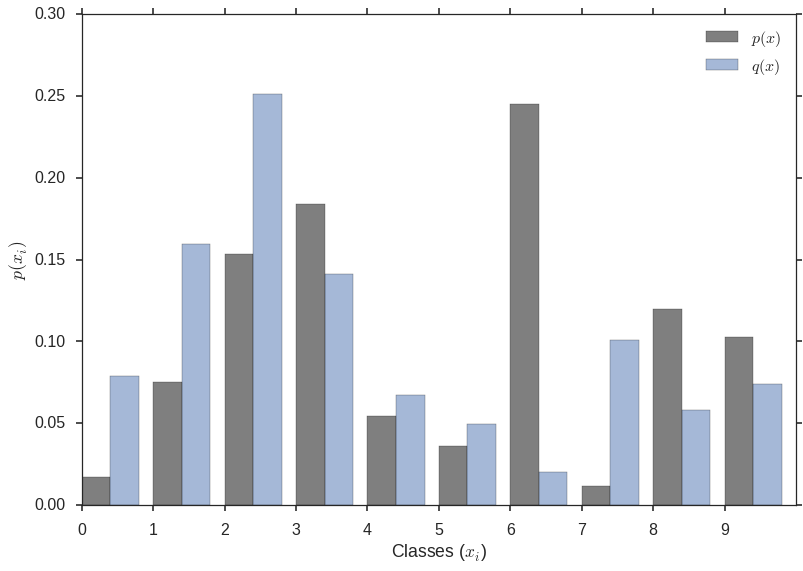

In [26]:
x = np.random.randn(10)
ex = np.exp(x - np.max(x))
p = ex/np.sum(ex)


y = np.random.randn(10)
ey = np.exp(y - np.max(y))
q = ey/np.sum(ey)

print "Total p:%s , q: %s " % (p.sum(), q.sum())
plt.bar(np.arange(10), p, 0.4, label="$p(x)$", color="black", alpha=0.5)
plt.bar(np.arange(10)+0.4, q, 0.4, label="$q(x)$", alpha=0.5)
plt.legend()
plt.xticks(range(10), range(10))
plt.xlabel("Classes ($x_i$)")
plt.ylabel("$p(x_i)$")

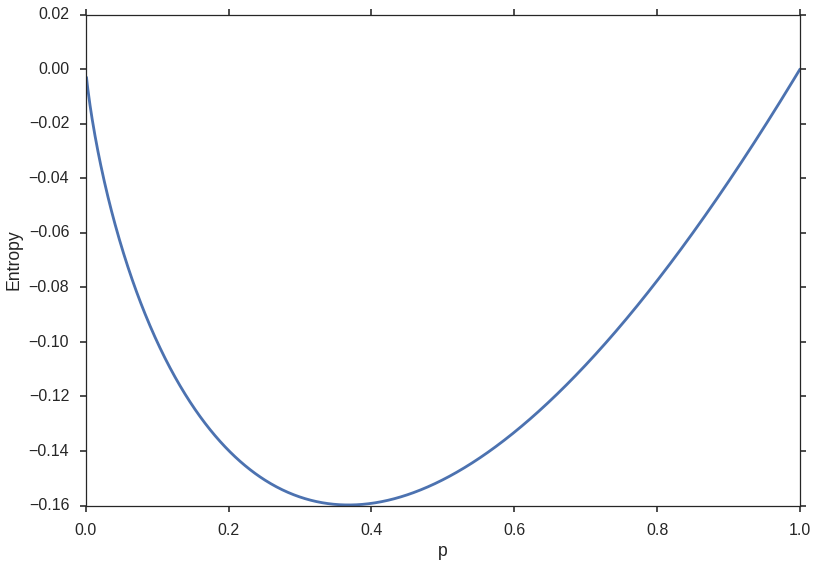

In [27]:
# Plot entropy

p = np.arange(0,1.001,0.001)
e = p*np.log10(p)
plt.plot(p, e, "-", label="Entropy")
plt.xlabel("p")
plt.ylabel("Entropy")

(1001, 2)
(1001, 2)
(1001, 2)


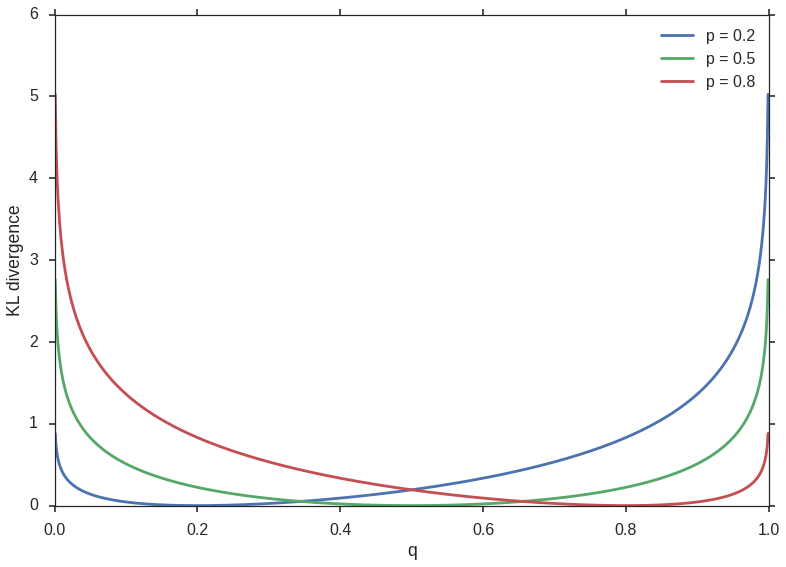

In [75]:
q = np.arange(0,1.001,0.001)
q_dist = np.vstack((q, 1-q)).T


#zip(p.tolist(),q_dist.tolist())
for px in [0.2, 0.5, 0.8]:
    p = np.tile([px, 1-px], (1,q.shape[0])).reshape(q_dist.shape)
    print p.shape
    e = [entropy(pi, qi) for pi, qi in zip(p.tolist(),q_dist.tolist())]
    plt.plot(q, e, label="p = %s" % px)
plt.legend()
plt.xlabel("q")
plt.ylabel("KL divergence")

In [71]:
q = np.arange(0.2,0.8,0.01)
q_dist = np.vstack((q, 1-q)).T

print q.min(), q.max()
#zip(p.tolist(),q_dist.tolist())
e_all = []
for px in np.arange(0.2,0.8,0.01):
    p = np.tile([px, 1-px], (1,q.shape[0])).reshape(q_dist.shape)
    e_all.append([entropy(pi, qi) for pi, qi in zip(p.tolist(),q_dist.tolist())])
    #plt.plot(q, e, label="p = %s" % px)
e_all = np.array(e_all)
e_all.shape

0.2 0.8


(61, 61)

[ 0 10 20 30 40 50 60] [ 0.2]


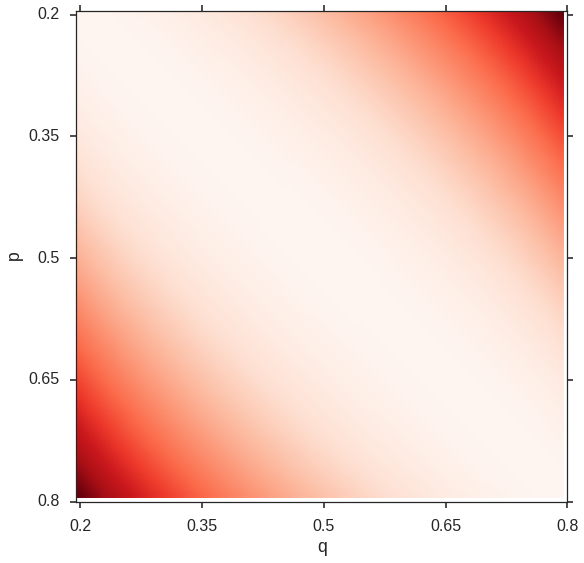

In [74]:
plt.imshow(e_all, cmap="Reds")
plt.xticks(np.linspace(0,e_all.shape[0], 5), np.linspace(q.min(), q.max(), 5))
plt.yticks(np.linspace(0,e_all.shape[0], 5), np.linspace(q.min(), q.max(), 5))
plt.xlabel("q")
plt.ylabel("p")
print np.arange(0,e_all.shape[0], 10), np.arange(q.min(), q.max(), 10)